# 과제 2 분산분석 실습
#### 2021441047 임영진

In [6]:
library(tidyverse)
library(effects)
library(car)

- 아래 데이터는 상품 포장지(A, B, C) 변화에 따른 판매량의 변화를 알아보기 위해 시판한 결과 판매량 도표입니다. 이 데이터를 활용하여 아래의 요구사항을 해결하세요.

| 포장지 | 1  | 2  | 3  | 4  | 5  | 6  |
|----|----|----|----|----|----|----|
| 포장지 A  | 4  | 10 | 11 | 12 | 8  | 8  |
| 포장지 B  | 9  | 7  | 8  | 6  | 6  | 5  |
| 포장지 C  | 10 | 12 | 9  | 5  | 12 | 14 |

In [60]:
wrapper <- c("A","A","A","A","A","A","B","B","B","B","B","B","C","C","C","C","C","C")
sales <- c(4,10,11,12,8,8,9,7,8,6,6,5,10,12,9,5,12,14)

In [61]:
# 데이터 생성
data <- tibble(wrapper, sales)
data$wrapper <- as.factor(data$wrapper) # 범주형으로 변환
str(data)

tibble [18 × 2] (S3: tbl_df/tbl/data.frame)
 $ wrapper: Factor w/ 3 levels "A","B","C": 1 1 1 1 1 1 2 2 2 2 ...
 $ sales  : num [1:18] 4 10 11 12 8 8 9 7 8 6 ...


### 1. 분산분석 결과와 분산분석표를 제시하고 포장지별 판매량의 차이가 있는지 논하세요.

wrapper
A B C 
6 6 6 

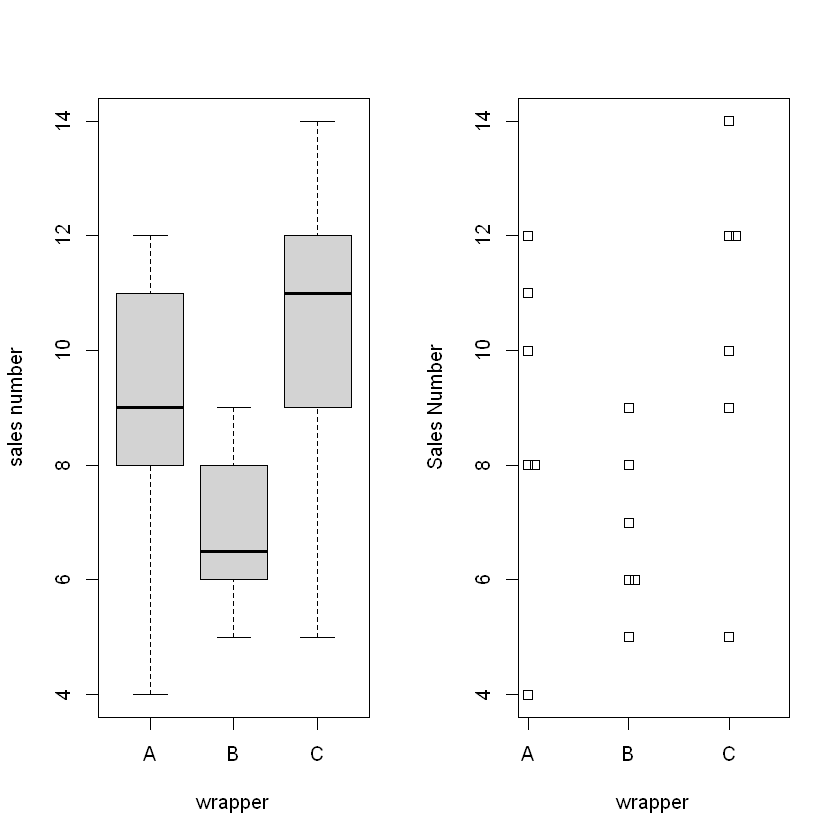

In [62]:
# 포장지 종류 별 관찰치 갯수
xtabs( ~ wrapper, data=data)
# 포장지 종류 별 판매량 분포
par(mfrow=c(1,2))
plot(sales ~ wrapper, data, ylab = "sales number")
stripchart(sales ~ wrapper, data, vertical = TRUE, method="stack", xlab = "wrapper", ylab = "Sales Number")

In [63]:
# 전체 판매량 평균
mean(data$sales)
# 포장지 별 판매량 평균
aggregate(sales~wrapper, data, mean)

[1] 8.666667

wrapper,sales
<fct>,<dbl>
A,8.833333
B,6.833333
C,10.333333


In [64]:
# 선형회귀모형
fit = lm(sales ~ wrapper, data, contrasts = list(wrapper="contr.treatment"))
summary(fit)


Call:
lm(formula = sales ~ wrapper, data = data, contrasts = list(wrapper = "contr.treatment"))

Residuals:
    Min      1Q  Median      3Q     Max 
-5.3333 -0.8333 -0.0833  1.6667  3.6667 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)    8.833      1.059   8.338 5.15e-07 ***
wrapperB      -2.000      1.498  -1.335    0.202    
wrapperC       1.500      1.498   1.001    0.333    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.595 on 15 degrees of freedom
Multiple R-squared:  0.2681,	Adjusted R-squared:  0.1705 
F-statistic: 2.748 on 2 and 15 DF,  p-value: 0.09623


 - 추정된 선형모형은 $8.833 - 2.000x_B + 1.500x_C$ 인데,
   - 8.833은 포장지 A 판매량의 평균 $\mu_A$ 
     - $x_B$, $x_C$가 0이면 포장지 A인 경우이므로, 이 때의 판매량 추정치가 된다.
   - -2.000은 포장지 B 판매량의 평균 $\mu_B$와 $\mu_A$의 차이 (6.833333 - 8.833333)
     - $x_B = 1$ $x_C = 0$이면 포장지 B인 경우이므로, 8.833 - 2.000 = 6.833 = $\mu_B$가 판매량 추정치가 된다.
   - 1.500은 포장지 C 판매량의 평균 $\mu_C$와 $\mu_A$의 차이이다. (10.333333 - 8.833333)
     - $x_B = 0$ $x_C = 1$이면 포장지 C인 경우이므로, 8.833 + 1.500 = 10.833 = $\mu_C$가 판매량 추정치가 된다.

In [65]:
# 절편 제거
fit_without_intercept = lm(sales ~ wrapper-1, data)
summary(fit_without_intercept)


Call:
lm(formula = sales ~ wrapper - 1, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.3333 -0.8333 -0.0833  1.6667  3.6667 

Coefficients:
         Estimate Std. Error t value Pr(>|t|)    
wrapperA    8.833      1.059   8.338 5.15e-07 ***
wrapperB    6.833      1.059   6.450 1.09e-05 ***
wrapperC   10.333      1.059   9.754 6.92e-08 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.595 on 15 degrees of freedom
Multiple R-squared:  0.9322,	Adjusted R-squared:  0.9187 
F-statistic: 68.76 on 3 and 15 DF,  p-value: 5.381e-09


- 절편을 제거하면, 각 포장지별 판매량의 평균 $\mu_A$, $\mu_B$, $\mu_C$가 회귀계수가 된다.
- 각 포장지 별로, 각 포장지 별 판매량의 평균을 회귀계수로 하는 것이 최소제곱추정량이기 때문이다.

In [66]:
# 절편만 있는 선형모형
# Intercept 값은, 전체 판매량의 평균인 8.66666666666667이 나오게 된다.
fit.null = lm(sales ~ 1, data)
summary(fit.null)


Call:
lm(formula = sales ~ 1, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.6667 -2.4167 -0.1667  2.0833  5.3333 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   8.6667     0.6716    12.9 3.28e-10 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.849 on 17 degrees of freedom


In [67]:
anova(fit.null, fit_without_intercept)

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,17,138,NA,NA,NA,NA
2,15,101,2,37,2.747525,0.09623148


- 여기서 H0는, (전체 판매량의 평균을 판매량의 추정치로 설정하는 것)과, (각 포장지 별 평균을, 포장지 별 판매량의 추정치로 설정하는 것)이 같다는 것이다.
  - 즉, 각 포장지별 평균들이, 전체 판매량의 평균과 차이가 없다는 것이다.
  - $\mu_A$ = $\mu_B$ = $\mu_C$
- p-value가 0.09623으로, 유의수준 0.05에서, H0를 기각하지 못한다.
  - 포장지 A, B, C 세 그룹에서 그룹 별로 평균의 차이가 있다고 할 수 없다.

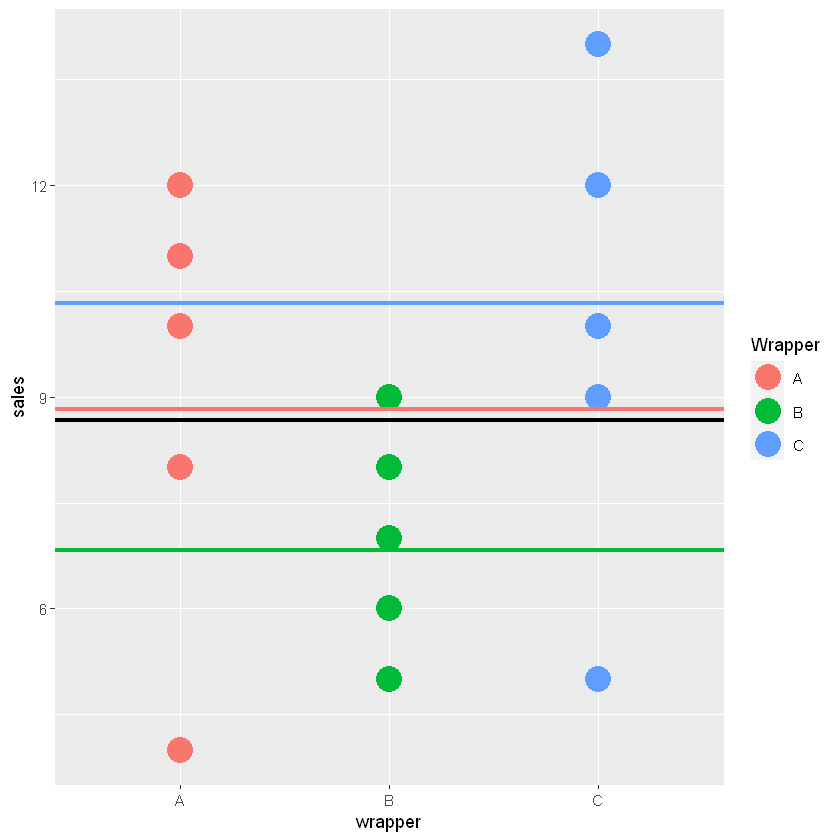

In [70]:
data <- data %>% group_by(wrapper) %>% mutate(sales_mean_group = mean(sales))
ggplot(data) +
geom_point(aes(x = wrapper, y = sales, color = wrapper), position = 'identity', size=7) +
geom_hline(aes(yintercept = sales_mean_group, color = wrapper), lwd=1.2) +
geom_hline(yintercept = mean(data$sales), lwd = 1.2) +
scale_color_discrete(name = 'Wrapper')

- 위 플롯에서 색이 있는 가로선은 포장지 별 판매량 평균, 검은 가로선은 전체 판매량 평균이다.
- 빨간색(A), 파란색(B), 녹색(C) 포장지 별 판매량 평균이, 검은색 전체 판매량 평균과 차이가 있다고 할 수 없는 것이다.

In [78]:
anova(fit)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
wrapper,2,37,18.500000,2.747525,0.09623148
Residuals,15,101,6.733333,NA,NA


- anova(fit)을 해도 결과를 확인할 수 있다.
  - wrapper행의 p-value가 0.09623으로, 유의수준 0.05에서, H0를 기각하지 못한다.
  - 포장지 A, B, C 세 그룹에서 그룹 별로 판매량의 평균의 차이가 있다고 할 수 없다.

- 포장지별 판매량의 차이는 없다.

### 2. Pairwise Test 및 구간추정 결과를 제시하고 논하세요.

- aov 함수로 분산분석 모델을 적합한다.
  - https://www.rdocumentation.org/packages/stats/versions/3.6.2/topics/aov
- TukeyHSD 함수
  - Create a set of confidence intervals on the differences between the means of the levels of a factor with the specified family-wise probability of coverage.
  - t 분포와 유사한 studentized range distribution 에 기반을 두고 각 그룹의 평균의 차이가 있는지 사후 검정을 시도한다.
  - https://www.rdocumentation.org/packages/stats/versions/3.6.2/topics/TukeyHSD

In [70]:
tci = TukeyHSD(aov(sales ~ wrapper, data))
tci

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = sales ~ wrapper, data = data)

$wrapper
    diff        lwr      upr     p adj
B-A -2.0 -5.8913922 1.891392 0.3984688
C-A  1.5 -2.3913922 5.391392 0.5873451
C-B  3.5 -0.3913922 7.391392 0.0811721


- 모든 쌍에서, p-adj 값이 0.05보다 크다. 유의수준 0.05에서 모든 쌍들이 평균 값의 차이가 없다. 

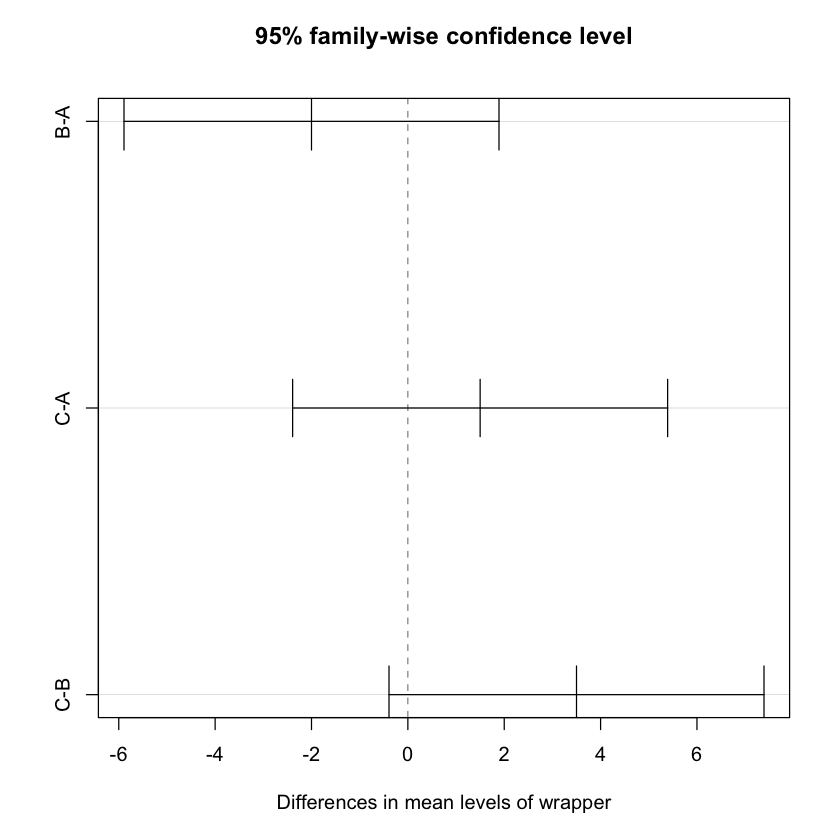

In [71]:
# TukeyHSD 함수의 결과물을 시각화
par(mfrow=c(1,1))
plot(tci)

- X축, Differences in mean levels of wrapper를 보면, 모든 쌍의 신뢰도구간이 0을 포함하고 있다.
- 0을 포함하면, 0이 아니라고 할 수 없으므로, 모든 쌍들의 평균의 차이가 0이 아니라고 할 수 없는 것이다.

### 3. 모형의 가정에 대하여 진단하고 조치방법을 논하세요.

#### 정규성 가정

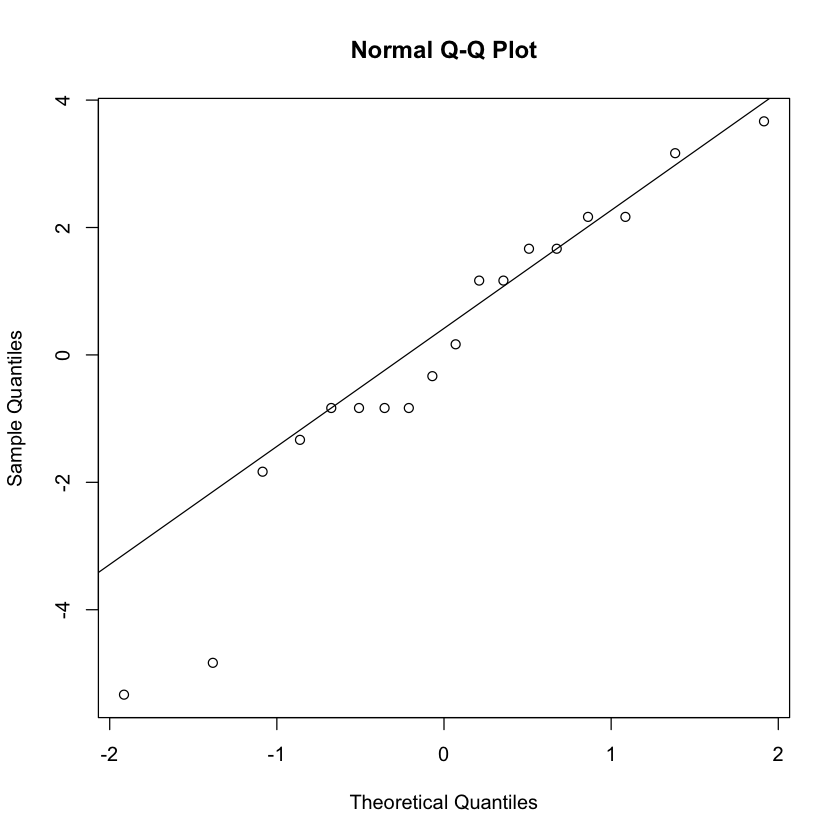

In [38]:
qqnorm(residuals(fit))
qqline(residuals(fit))

In [39]:
shapiro.test(fit$residuals)


	Shapiro-Wilk normality test

data:  fit$residuals
W = 0.93207, p-value = 0.2111


- plot에서도, shapiro-Wilk test에서도 정규성가정을 잘 만족하고 있다.
  - 다만, plot에서는 왼쪽 하단 두 개의 값이 기준선을 벗어나 있기는 하다.

#### 등분산성 가정

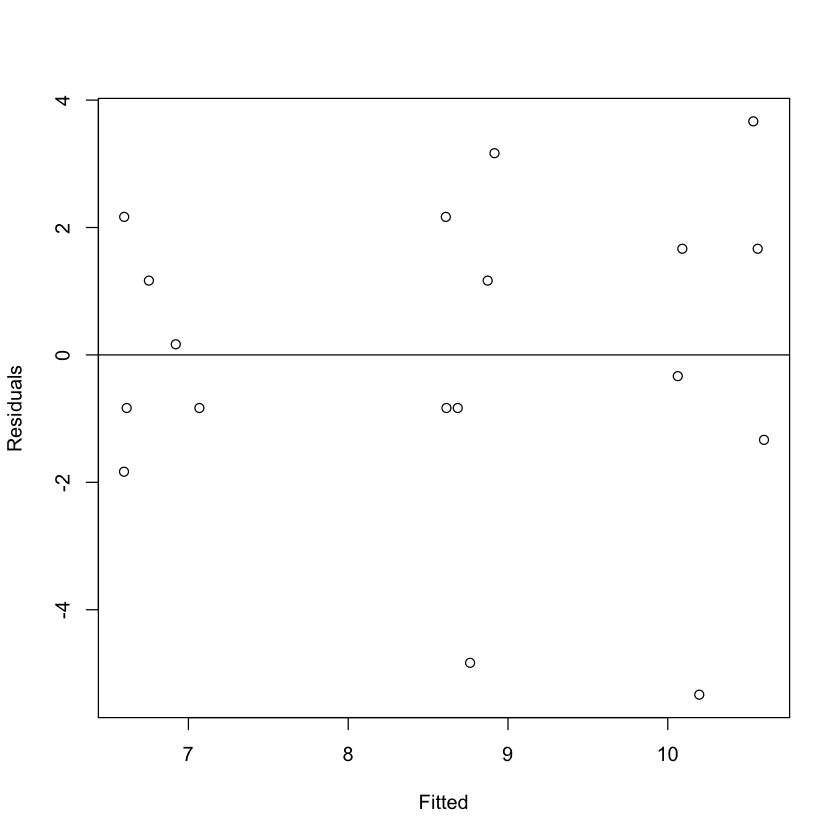

In [40]:
plot(jitter(fitted(fit)), residuals(fit), xlab = "Fitted", ylab = "Residuals")
abline(h=0)

- 잔차에 어떠한 패턴이 관찰되지 않는다.

In [82]:
med = with(data, tapply(sales, wrapper, median))
# wrapper별로, sales값의 median을 구함
med

A    B    C 
 9.0  6.5 11.0

In [83]:
abs.resid = with(data, abs(sales -med[wrapper]))
# 각 sales에서, wrapper별 중간값을 뺌.

In [84]:
anova(lm(abs.resid ~ wrapper, data))

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
wrapper,2,4.777778,2.388889,1.00939,0.3879014
Residuals,15,35.500000,2.366667,NA,NA


- wrapper별로 잔차의 차이가 있는지 확인
  - p-값이 0.3879014, 유의수준 0.05에서 귀무가설을 채택한다.
  - 즉, wrapper별 잔차의 차이가 있다는 통계적 증거는 찾지 못하였다.
  - 등분산성을 만족한다.

In [80]:
bartlett.test(sales ~ wrapper, data)


	Bartlett test of homogeneity of variances

data:  sales by wrapper
Bartlett's K-squared = 2.5659, df = 2, p-value = 0.2772


- 분석 결과 유의수준 0.05에서 귀무가설을 기각하지 못함
- 등분산성을 만족한다.